In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [6]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=6,random_state=13)

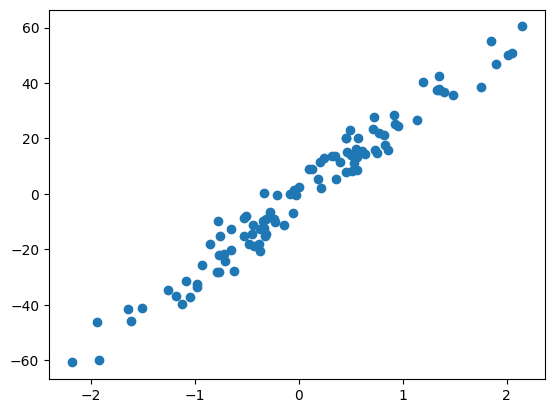

In [7]:
plt.scatter(X,y)

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=2)


In [80]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [81]:
lr.fit(X_train,y_train)

LinearRegression()

In [82]:
print(lr.coef_) # slope
print(lr.intercept_) #curve

[27.76360794]
-0.6813043278535142


In [83]:
np.mean(cross_val_score(lr,X=X_test,y=y_test,cv=3))

0.9127462250960049

In [84]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9555403706085048

In [91]:
class GRDRegressor:
    def __init__(self, epochs, learning_rate):
        self.m = 100
        self.b = -90
        self.epochs = epochs
        self.lr = learning_rate
    
    def train(self, X_train, y_train):
        for i in range(self.epochs):
            self.slope_b = -2 * np.sum(y_train - self.m*X_train.ravel()- self.b) #ravel function convert the data into 1 dimensional data
            self.slope_m = -2 * np.sum((y_train - self.m*X_train.ravel()- self.b) * X_train.ravel())
            
            self.b = self.b - (self.lr * self.slope_b )
            self.m = self.m - (self.lr * self.slope_m )
        print(self.b ,self.m) 
    
    def predict(self, X_test):
        return self.m * X_test + self.b       

In [92]:
grd = GRDRegressor(35, 0.01)
grd.train(X_train, y_train)

-0.681295212786193 27.76361353430936


In [93]:
y_pred = grd.predict(X_test)

In [94]:
r2_score(y_pred,y_test)

0.9555403757017016